# CNN

In [ ]:
# Overall Model architecture

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 16)           2048      
                                                                 
 conv1d_4 (Conv1D)           (None, 296, 128)          10368     
                                                                 
 global_max_pooling1d_4 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 320)               41280     
                                                                 
 dense_9 (Dense)             (None, 5)                 1605      
                                                                 
Total params: 55301 (216.02 KB)
Trainable params: 55301 (216.02 KB)
Non-trainable params: 0 (0.00 Byte)
________________

## Imports

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from google.colab import output#oven timer
import os
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

In [2]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
  inflating: __MACOSX/._Data         
   creating: Data/Test_Data/
  inflating: __MACOSX/Data/._Test_Data  
  inflating: Data/Validation_and_Test_Data.ipynb  
  inflating: __MACOSX/Data/._Validation_and_Test_Data.ipynb  
   creating: Data/Train_Data/
  inflating: __MACOSX/Data/._Train_Data  
   creating: Data/Validation_Data/
  inflating: __MACOSX/Data/._Validation_Data  
  inflating: Data/Train_Data_Augmentation_and_PreProcessing.ipynb  
  inflating: __MACOSX/Data/._Train_Data_Augmentation_and_PreProcessing.ipynb  
   creating: Data/.ipynb_checkpoints/
  inflating: __MACOSX/Data/._.ipynb_checkpoints  
   creating: Data/Test_Data/un_processed/
  inflating: __MACOSX/Data/Test_Data/._un_processed  
   creating: Data/Test_Data/pre_processed/
  inflating: __MACOSX/Data/Test_Data/._pre_processed  
   creating: Data/Train_Data/UnProcessed/
  inflating: __MACOSX/Data/Train_Data/._UnProcessed  
   creating: Data/Train_Data/pre_processed/
  inflating: __MAC

# Pre Proccess

##Load Data

In [9]:
train_data_17k_unprocessed_path= "/content/train_data_unprocessed.csv"
train_data_17k_pre_lem_path = '/content/Data/Train_Data/pre_processed/train_data_lemmatized.csv'
train_data_17k_pre_lem_sw_path = "/content/Data/Train_Data/pre_processed/train_data_lemmatized_sw_removed.csv"
train_data_17k_pre_sw_path= "/content/Data/Train_Data/pre_processed/train_data_sw_removed.csv"



train_data_17k_unprocessed = pd.read_csv(train_data_17k_unprocessed_path, index_col=0)
train_data_17k_unprocessed.reset_index(inplace=True)

def reset_ids(df):
    df['id'] = range(1, len(df) + 1)
    return df

train_data_17k_unprocessed= reset_ids(train_data_17k_unprocessed)


train_data_unprocessed_unaugmented = train_data_17k_unprocessed.iloc[:4355]
train_data_17k_pre_lem_sw= pd.read_csv(train_data_17k_pre_lem_sw_path)
train_data_17k_pre_sw= pd.read_csv(train_data_17k_pre_sw_path)
train_data_17k_pre_lem= pd.read_csv(train_data_17k_pre_lem_path)


test_data_unprocessed_path= "Data/Test_Data/un_processed/test_data_filtered.csv"
test_data_pre_lem_sw_path = 'Data/Test_Data/pre_processed/test_data_lemmatized_sw_removed.csv'

test_data_unprocessed= pd.read_csv(test_data_unprocessed_path, index_col=0)
test_data_unprocessed= test_data_unprocessed.reset_index(drop=True)
test_data_pre_lem_sw= pd.read_csv(test_data_pre_lem_sw_path)

valid_data_unprocessed_path= "Data/Validation_Data/UnProcessed/validation_data_filtered.csv"
valid_data_pre_lem_path= "Data/Validation_Data/pre_processed/validation_data_lemmatized.csv"
valid_data_pre_lem_sw_path= "Data/Validation_Data/pre_processed/validation_data_lemmatized_sw_removed.csv"
valid_data_pre_sw_path="Data/Validation_Data/pre_processed/validation_data_sw_removed.csv"

valid_data_unprocessed=pd.read_csv(valid_data_unprocessed_path, index_col=0)
valid_data_pre_lem=pd.read_csv(valid_data_pre_lem_path, index_col=0)
valid_data_pre_lem_sw=pd.read_csv(valid_data_pre_lem_sw_path, index_col=0)
valid_data_pre_sw= pd.read_csv(valid_data_pre_sw_path, index_col=0)




train_en_x_unp_unaug = train_data_unprocessed_unaugmented['en'].values
train_la_x_unp_unaug = train_data_unprocessed_unaugmented['la'].values
train_en_x_unp_aug= train_data_17k_unprocessed['en'].values
train_la_x_unp_aug = train_data_17k_unprocessed['la'].values
valid_en_x_unp = valid_data_unprocessed['en'].values
valid_la_x_unp = valid_data_unprocessed['la'].values
test_en_x_unp  = test_data_unprocessed['en'].values
test_la_x_unp  = test_data_unprocessed['la'].values

train_en_x_lem_sw = train_data_17k_pre_lem_sw['en'].values
train_la_x_lem_sw = train_data_17k_pre_lem_sw['la'].values
test_en_x_lem_sw = test_data_pre_lem_sw['en'].values
test_la_x_lem_sw = test_data_pre_lem_sw['la'].values
valid_en_x_lem_sw = valid_data_pre_lem_sw['en'].values
valid_la_x_lem_sw = valid_data_pre_lem_sw['la'].values


train_y_unp_unaug = train_data_unprocessed_unaugmented['file'].values
valid_y_unp_unaug = valid_data_unprocessed['file'].values
test_y_unp_unaug = test_data_unprocessed['file'].values

train_y_unp_aug = train_data_17k_unprocessed['file'].values
valid_y_unp_aug = valid_data_unprocessed['file'].values
test_y_unp_aug = test_data_unprocessed['file'].values

train_y_lem_sw = train_data_17k_pre_lem_sw['file'].values
valid_y_lem_sw = valid_data_pre_lem_sw['file'].values
test_y_lem_sw = test_data_pre_lem_sw['file'].values


# Combine labels from all training datasets for fitting the encoder
combined_train_labels = np.concatenate([
    train_y_unp_unaug,
    train_y_unp_aug,
    train_y_lem_sw
])

# Initialize and fit the OneHotEncoder
label_encoder = OneHotEncoder()
label_encoder.fit(combined_train_labels.reshape(-1, 1))

# Function to transform labels using the fitted encoder
def encode_labels(labels):
    return label_encoder.transform(labels.reshape(-1, 1)).toarray()

# Apply the transformation to each set of labels
train_y_unp_unaug_encoded = encode_labels(train_y_unp_unaug)
valid_y_unp_unaug_encoded = encode_labels(valid_y_unp_unaug)
test_y_unp_unaug_encoded = encode_labels(test_y_unp_unaug)

train_y_unp_aug_encoded = encode_labels(train_y_unp_aug)
valid_y_unp_aug_encoded = encode_labels(valid_y_unp_aug)
test_y_unp_aug_encoded = encode_labels(test_y_unp_aug)

train_y_lem_sw_encoded = encode_labels(train_y_lem_sw)
valid_y_lem_sw_encoded = encode_labels(valid_y_lem_sw)
test_y_lem_sw_encoded = encode_labels(test_y_lem_sw)


## Tokenize

In [10]:
def tokenize(text_nump, tokenizer, maxlen):
  seq = tokenizer.texts_to_sequences(text_nump)
  return tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen = maxlen)

In [11]:
# Define parameters
max_len = 300  # maximum sequence length
vocab_size = 128  # ASCII characters

# Tokenizers for unprocessed unaugmented data
tokenizer_la_unp_unaug = tf.keras.preprocessing.text.Tokenizer(char_level=True, filters=None, lower=False)
tokenizer_la_unp_unaug.fit_on_texts(train_la_x_unp_unaug)
tokenizer_en_unp_unaug = tf.keras.preprocessing.text.Tokenizer(char_level=True, filters=None, lower=False)
tokenizer_en_unp_unaug.fit_on_texts(train_en_x_unp_unaug)

# Tokenizers for unprocessed augmented data
tokenizer_la_unp_aug = tf.keras.preprocessing.text.Tokenizer(char_level=True, filters=None, lower=False)
tokenizer_la_unp_aug.fit_on_texts(train_la_x_unp_aug)
tokenizer_en_unp_aug = tf.keras.preprocessing.text.Tokenizer(char_level=True, filters=None, lower=False)
tokenizer_en_unp_aug.fit_on_texts(train_en_x_unp_aug)

# Tokenizers for lemmatized and stop words removed data
tokenizer_la_lem_sw = tf.keras.preprocessing.text.Tokenizer(char_level=True, filters=None, lower=False)
tokenizer_la_lem_sw.fit_on_texts(train_la_x_lem_sw)
tokenizer_en_lem_sw = tf.keras.preprocessing.text.Tokenizer(char_level=True, filters=None, lower=False)
tokenizer_en_lem_sw.fit_on_texts(train_en_x_lem_sw)

# Tokenizing and padding sequences for each dataset version
train_seq_la_unp_unaug = tokenize(train_la_x_unp_unaug, tokenizer_la_unp_unaug, max_len)
train_seq_en_unp_unaug = tokenize(train_en_x_unp_unaug, tokenizer_en_unp_unaug, max_len)
valid_seq_la_unp_unaug = tokenize(valid_la_x_unp, tokenizer_la_unp_unaug, max_len)
valid_seq_en_unp_unaug = tokenize(valid_en_x_unp, tokenizer_en_unp_unaug, max_len)
test_seq_la_unp_unaug = tokenize(test_la_x_unp, tokenizer_la_unp_unaug, max_len)
test_seq_en_unp_unaug = tokenize(test_en_x_unp, tokenizer_en_unp_unaug, max_len)

train_seq_la_unp_aug = tokenize(train_la_x_unp_aug, tokenizer_la_unp_aug, max_len)
train_seq_en_unp_aug = tokenize(train_en_x_unp_aug, tokenizer_en_unp_aug, max_len)
valid_seq_la_unp_aug = tokenize(valid_la_x_unp, tokenizer_la_unp_aug, max_len)
valid_seq_en_unp_aug = tokenize(valid_en_x_unp, tokenizer_en_unp_aug, max_len)
test_seq_la_unp_aug = tokenize(test_la_x_unp, tokenizer_la_unp_aug, max_len)
test_seq_en_unp_aug = tokenize(test_en_x_unp, tokenizer_en_unp_aug, max_len)

train_seq_la_lem_sw = tokenize(train_la_x_lem_sw, tokenizer_la_lem_sw, max_len)
train_seq_en_lem_sw = tokenize(train_en_x_lem_sw, tokenizer_en_lem_sw, max_len)
valid_seq_la_lem_sw = tokenize(valid_la_x_lem_sw, tokenizer_la_lem_sw, max_len)
valid_seq_en_lem_sw = tokenize(valid_en_x_lem_sw, tokenizer_en_lem_sw, max_len)
test_seq_la_lem_sw = tokenize(test_la_x_lem_sw, tokenizer_la_lem_sw, max_len)
test_seq_en_lem_sw = tokenize(test_en_x_lem_sw, tokenizer_en_lem_sw, max_len)


# Model

In [12]:
def make_model(): #match model architecture
  # Build the model
  weight_decay = 0.0001
  l1_lambda = 0.001
  regularizer = tf.keras.regularizers.l1_l2(l1=l1_lambda, l2=weight_decay)
  model = models.Sequential()

  model.add(layers.Embedding(input_dim=vocab_size, output_dim=16, input_length=300))
  model.add(layers.Conv1D(128, 5, activation='relu', kernel_regularizer=regularizer))
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(320, activation='relu', kernel_regularizer=regularizer))
  model.add(layers.Dense(5, activation='softmax', kernel_regularizer=regularizer))


  # Compile the model
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model
def decode_predictions(predictions):
    return predictions.argmax(axis=1)

## Latin Model

Epoch 1/8
182/182 [==============================] - 10s 33ms/step - loss: 1.3287 - accuracy: 0.3894 - val_loss: 0.1585 - val_accuracy: 0.9449
Epoch 2/8
182/182 [==============================] - 1s 5ms/step - loss: 0.7156 - accuracy: 0.7134 - val_loss: 0.1031 - val_accuracy: 0.9752
Epoch 3/8
182/182 [==============================] - 1s 6ms/step - loss: 0.5186 - accuracy: 0.7989 - val_loss: 0.0962 - val_accuracy: 0.9697
Epoch 4/8
182/182 [==============================] - 1s 5ms/step - loss: 0.4041 - accuracy: 0.8551 - val_loss: 0.0748 - val_accuracy: 0.9752
Epoch 5/8
182/182 [==============================] - 1s 4ms/step - loss: 0.3269 - accuracy: 0.8831 - val_loss: 0.0889 - val_accuracy: 0.9780
Epoch 6/8
182/182 [==============================] - 1s 5ms/step - loss: 0.2711 - accuracy: 0.9086 - val_loss: 0.0938 - val_accuracy: 0.9752


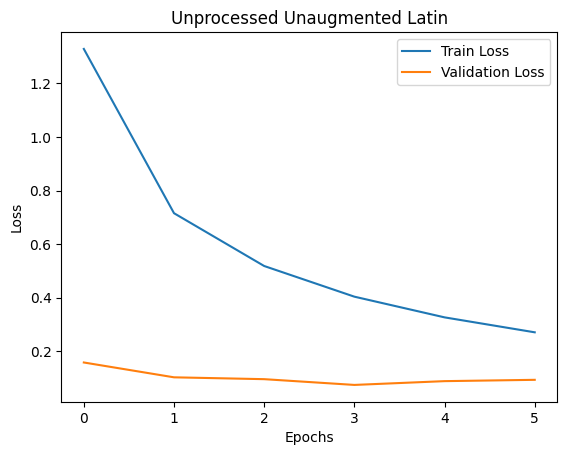

12/12 [==============================] - 0s 6ms/step
Epoch 1/8
182/182 [==============================] - 5s 19ms/step - loss: 1.4878 - accuracy: 0.3359 - val_loss: 1.2151 - val_accuracy: 0.4711
Epoch 2/8
182/182 [==============================] - 1s 5ms/step - loss: 0.9268 - accuracy: 0.6445 - val_loss: 0.8817 - val_accuracy: 0.6198
Epoch 3/8
182/182 [==============================] - 1s 5ms/step - loss: 0.6415 - accuracy: 0.7649 - val_loss: 0.4207 - val_accuracy: 0.8264
Epoch 4/8
182/182 [==============================] - 1s 5ms/step - loss: 0.4985 - accuracy: 0.8172 - val_loss: 0.4200 - val_accuracy: 0.8237
Epoch 5/8
182/182 [==============================] - 1s 6ms/step - loss: 0.3969 - accuracy: 0.8553 - val_loss: 0.5168 - val_accuracy: 0.7934
Epoch 6/8
182/182 [==============================] - 1s 5ms/step - loss: 0.3257 - accuracy: 0.8824 - val_loss: 0.4565 - val_accuracy: 0.8457


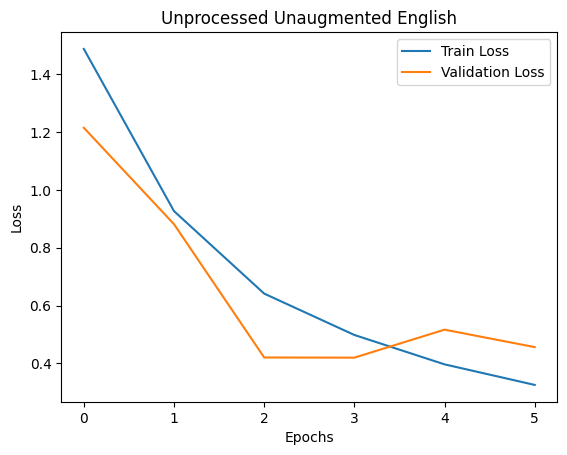

12/12 [==============================] - 0s 2ms/step
Epoch 1/8
723/723 [==============================] - 7s 8ms/step - loss: 0.9513 - accuracy: 0.5919 - val_loss: 0.0935 - val_accuracy: 0.9835
Epoch 2/8
723/723 [==============================] - 3s 5ms/step - loss: 0.5842 - accuracy: 0.7713 - val_loss: 0.0958 - val_accuracy: 0.9780
Epoch 3/8
723/723 [==============================] - 3s 4ms/step - loss: 0.4560 - accuracy: 0.8282 - val_loss: 0.0717 - val_accuracy: 0.9835
Epoch 4/8
723/723 [==============================] - 3s 4ms/step - loss: 0.3750 - accuracy: 0.8581 - val_loss: 0.0698 - val_accuracy: 0.9780
Epoch 5/8
723/723 [==============================] - 4s 6ms/step - loss: 0.3171 - accuracy: 0.8811 - val_loss: 0.0611 - val_accuracy: 0.9835
Epoch 6/8
723/723 [==============================] - 3s 4ms/step - loss: 0.2679 - accuracy: 0.9007 - val_loss: 0.0924 - val_accuracy: 0.9780
Epoch 7/8
723/723 [==============================] - 3s 4ms/step - loss: 0.2347 - accuracy: 0.9136 - 

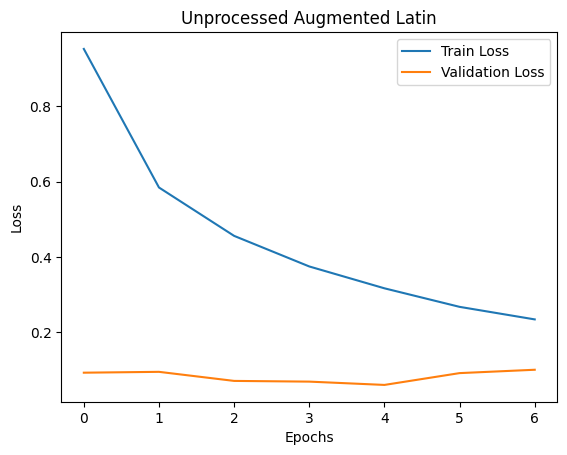

12/12 [==============================] - 0s 3ms/step
Epoch 1/8
723/723 [==============================] - 7s 7ms/step - loss: 1.0309 - accuracy: 0.5738 - val_loss: 0.4974 - val_accuracy: 0.7906
Epoch 2/8
723/723 [==============================] - 3s 4ms/step - loss: 0.4977 - accuracy: 0.8119 - val_loss: 0.5297 - val_accuracy: 0.7934
Epoch 3/8
723/723 [==============================] - 4s 5ms/step - loss: 0.3323 - accuracy: 0.8791 - val_loss: 0.4343 - val_accuracy: 0.8375
Epoch 4/8
723/723 [==============================] - 4s 5ms/step - loss: 0.2327 - accuracy: 0.9181 - val_loss: 0.3234 - val_accuracy: 0.8871
Epoch 5/8
723/723 [==============================] - 3s 4ms/step - loss: 0.1706 - accuracy: 0.9392 - val_loss: 0.4295 - val_accuracy: 0.8650
Epoch 6/8
723/723 [==============================] - 3s 4ms/step - loss: 0.1274 - accuracy: 0.9555 - val_loss: 0.9422 - val_accuracy: 0.7741


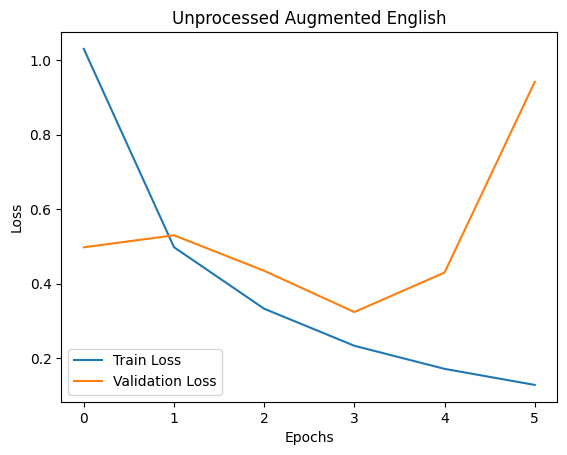

12/12 [==============================] - 0s 2ms/step
Epoch 1/8
723/723 [==============================] - 7s 8ms/step - loss: 0.9699 - accuracy: 0.5854 - val_loss: 0.1138 - val_accuracy: 0.9752
Epoch 2/8
723/723 [==============================] - 4s 5ms/step - loss: 0.5630 - accuracy: 0.7804 - val_loss: 0.1017 - val_accuracy: 0.9780
Epoch 3/8
723/723 [==============================] - 4s 5ms/step - loss: 0.4409 - accuracy: 0.8321 - val_loss: 0.1063 - val_accuracy: 0.9752
Epoch 4/8
723/723 [==============================] - 4s 5ms/step - loss: 0.3579 - accuracy: 0.8681 - val_loss: 0.0848 - val_accuracy: 0.9835
Epoch 5/8
723/723 [==============================] - 3s 4ms/step - loss: 0.3089 - accuracy: 0.8896 - val_loss: 0.0656 - val_accuracy: 0.9835
Epoch 6/8
723/723 [==============================] - 3s 4ms/step - loss: 0.2582 - accuracy: 0.9053 - val_loss: 0.0587 - val_accuracy: 0.9890
Epoch 7/8
723/723 [==============================] - 4s 6ms/step - loss: 0.2196 - accuracy: 0.9215 - 

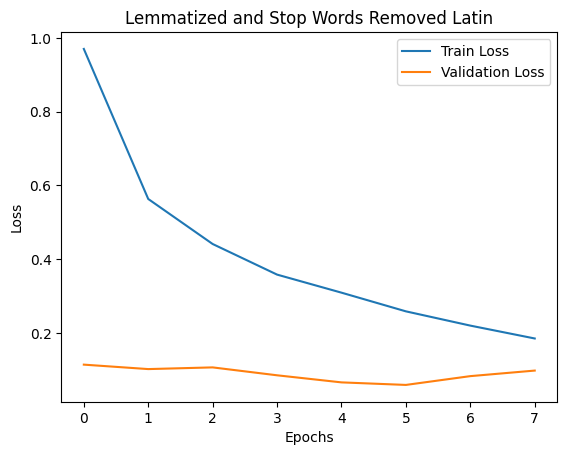

12/12 [==============================] - 0s 15ms/step
Epoch 1/8
723/723 [==============================] - 9s 10ms/step - loss: 1.0061 - accuracy: 0.5847 - val_loss: 0.5466 - val_accuracy: 0.7769
Epoch 2/8
723/723 [==============================] - 7s 9ms/step - loss: 0.5429 - accuracy: 0.7979 - val_loss: 0.4264 - val_accuracy: 0.8375
Epoch 3/8
723/723 [==============================] - 4s 6ms/step - loss: 0.3575 - accuracy: 0.8701 - val_loss: 0.5052 - val_accuracy: 0.8209
Epoch 4/8
723/723 [==============================] - 3s 4ms/step - loss: 0.2467 - accuracy: 0.9125 - val_loss: 0.3184 - val_accuracy: 0.8843
Epoch 5/8
723/723 [==============================] - 4s 5ms/step - loss: 0.1816 - accuracy: 0.9381 - val_loss: 0.2831 - val_accuracy: 0.9118
Epoch 6/8
723/723 [==============================] - 3s 5ms/step - loss: 0.1281 - accuracy: 0.9564 - val_loss: 0.2882 - val_accuracy: 0.9036
Epoch 7/8
723/723 [==============================] - 3s 4ms/step - loss: 0.0922 - accuracy: 0.9686 

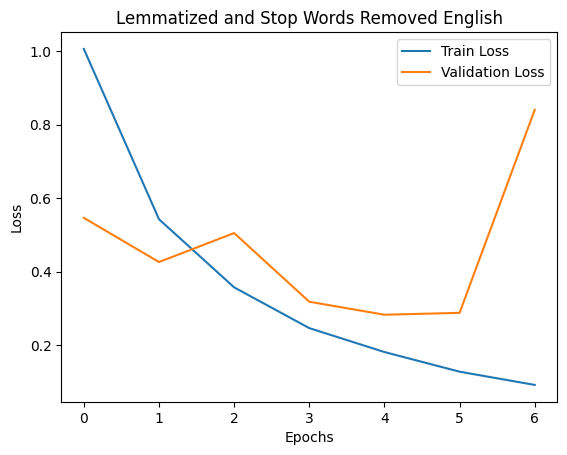

12/12 [==============================] - 0s 2ms/step


In [18]:

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def plot_loss(history, title):
    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Unprocessed unaugmented Latin
model_unp_unaug_la = make_model()
history_unp_unaug_la = model_unp_unaug_la.fit(train_seq_la_unp_unaug, train_y_unp_unaug_encoded, epochs=8, batch_size=24, validation_data=(valid_seq_la_unp_unaug, valid_y_unp_unaug_encoded), callbacks=[early_stopping])
plot_loss(history_unp_unaug_la, 'Unprocessed Unaugmented Latin')
test_predictions_unp_unaug_la = model_unp_unaug_la.predict(test_seq_la_unp_unaug)
del model_unp_unaug_la
tf.keras.backend.clear_session()

# Unprocessed unaugmented English
model_unp_unaug_en = make_model()
history_unp_unaug_en = model_unp_unaug_en.fit(train_seq_en_unp_unaug, train_y_unp_unaug_encoded, epochs=8, batch_size=24, validation_data=(valid_seq_en_unp_unaug, valid_y_unp_unaug_encoded), callbacks=[early_stopping])
plot_loss(history_unp_unaug_en, 'Unprocessed Unaugmented English')
test_predictions_unp_unaug_en = model_unp_unaug_en.predict(test_seq_en_unp_unaug)
del model_unp_unaug_en
tf.keras.backend.clear_session()

# Unprocessed augmented Latin
model_unp_aug_la = make_model()
history_unp_aug_la = model_unp_aug_la.fit(train_seq_la_unp_aug, train_y_unp_aug_encoded, epochs=8, batch_size=24, validation_data=(valid_seq_la_unp_aug, valid_y_unp_aug_encoded), callbacks=[early_stopping])
plot_loss(history_unp_aug_la, 'Unprocessed Augmented Latin')
test_predictions_unp_aug_la = model_unp_aug_la.predict(test_seq_la_unp_aug)
del model_unp_aug_la
tf.keras.backend.clear_session()

# Unprocessed augmented English
model_unp_aug_en = make_model()
history_unp_aug_en = model_unp_aug_en.fit(train_seq_en_unp_aug, train_y_unp_aug_encoded, epochs=8, batch_size=24, validation_data=(valid_seq_en_unp_aug, valid_y_unp_aug_encoded), callbacks=[early_stopping])
plot_loss(history_unp_aug_en, 'Unprocessed Augmented English')
test_predictions_unp_aug_en = model_unp_aug_en.predict(test_seq_en_unp_aug)
del model_unp_aug_en
tf.keras.backend.clear_session()

# Lemmatized and stop words removed Latin
model_lem_sw_la = make_model()
history_lem_sw_la = model_lem_sw_la.fit(train_seq_la_lem_sw, train_y_lem_sw_encoded, epochs=8, batch_size=24, validation_data=(valid_seq_la_lem_sw, valid_y_lem_sw_encoded), callbacks=[early_stopping])
plot_loss(history_lem_sw_la, 'Lemmatized and Stop Words Removed Latin')
test_predictions_lem_sw_la = model_lem_sw_la.predict(test_seq_la_lem_sw)
del model_lem_sw_la
tf.keras.backend.clear_session()

# Lemmatized and stop words removed English
model_lem_sw_en = make_model()
history_lem_sw_en = model_lem_sw_en.fit(train_seq_en_lem_sw, train_y_lem_sw_encoded, epochs=8, batch_size=24, validation_data=(valid_seq_en_lem_sw, valid_y_lem_sw_encoded), callbacks=[early_stopping])
plot_loss(history_lem_sw_en, 'Lemmatized and Stop Words Removed English')
test_predictions_lem_sw_en = model_lem_sw_en.predict(test_seq_en_lem_sw)
del model_lem_sw_en
tf.keras.backend.clear_session()




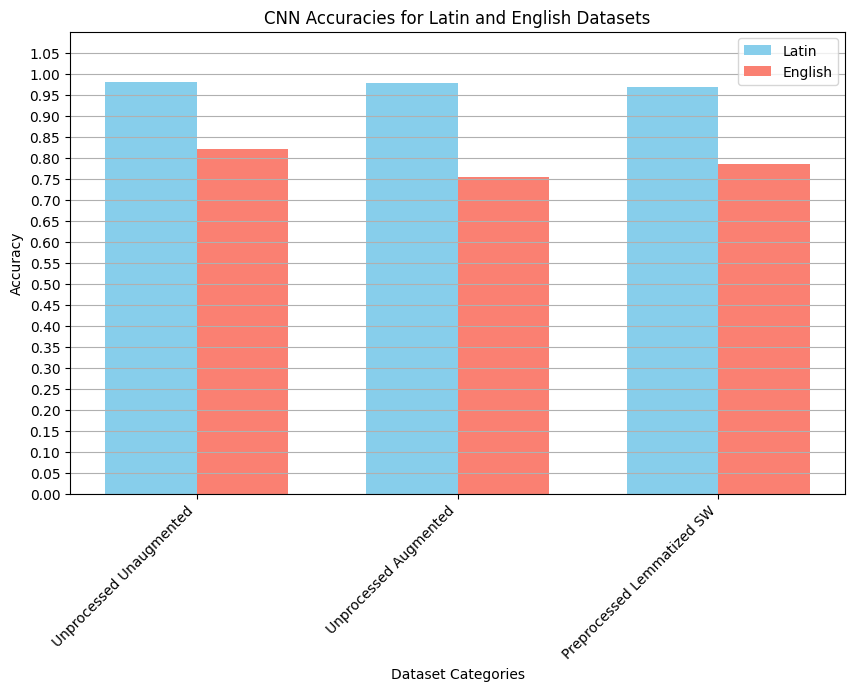

In [23]:
def calculate_accuracy(true_labels, predictions):
    true_classes = decode_predictions(true_labels)
    predicted_classes = decode_predictions(predictions)
    return accuracy_score(true_classes, predicted_classes)

# Define the labels for the categories
dataset_labels = ['Unprocessed Unaugmented', 'Unprocessed Augmented', 'Preprocessed Lemmatized SW']

# Calculate accuracies for Latin
latin_accuracies = [
    calculate_accuracy(test_y_unp_unaug_encoded, test_predictions_unp_unaug_la),
    calculate_accuracy(test_y_unp_aug_encoded, test_predictions_unp_aug_la),
    calculate_accuracy(test_y_lem_sw_encoded, test_predictions_lem_sw_la)
]

# Calculate accuracies for English
english_accuracies = [
    calculate_accuracy(test_y_unp_unaug_encoded, test_predictions_unp_unaug_en),
    calculate_accuracy(test_y_unp_aug_encoded, test_predictions_unp_aug_en),
    calculate_accuracy(test_y_lem_sw_encoded, test_predictions_lem_sw_en)
]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(dataset_labels))

latin_bars = plt.bar(index, latin_accuracies, bar_width, label='Latin', color='skyblue')
english_bars = plt.bar(index + bar_width, english_accuracies, bar_width, label='English', color='salmon')

plt.xlabel('Dataset Categories')
plt.ylabel('Accuracy')
plt.title('CNN Accuracies for Latin and English Datasets')
plt.xticks(index + bar_width / 2, dataset_labels, rotation=45, ha="right")
plt.legend()
plt.yticks(np.arange(0, 1.1, 0.05))
plt.grid(axis='y')
plt.ylim(0, 1.1)
plt.show()

